# Machine Learning: A Quantitative Approach

+ The general notion here is that Ridge regression improves prediction errors by shrinking large regression coefficients in order to reduce overfitting.

In [1]:
%matplotlib inline

In [5]:
import sys, csv
import time

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import Counter
import seaborn as sns

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Dataset

In [12]:
vehicles_df = pd.read_csv("datasets/vehicles.csv", low_memory = False)

In [13]:
vehicles_displ_mpg_all = vehicles_df[['displ', 'UHighway']]

In [14]:
vehicles_displ_mpg = vehicles_displ_mpg_all[vehicles_displ_mpg_all.displ > 0]

### Split / Train Test

In [15]:
half = int(len(vehicles_displ_mpg) / 2)

In [16]:
first_half = vehicles_displ_mpg[:half]
second_half = vehicles_displ_mpg[half:]

In [23]:
first_half_sorted = first_half.sort_values(by=['displ', 'UHighway'])
first_half_grouped_by_median = pd.DataFrame(
    {'train_median' : first_half_sorted.groupby('displ')['UHighway'].median()}).reset_index()

In [24]:
first_half_x = first_half_grouped_by_median['displ'].values.reshape(-1,1)

In [25]:
print(type(first_half_x))

<class 'numpy.ndarray'>


In [26]:
first_half_y = first_half_grouped_by_median['train_median'].values.reshape(-1,1)

In [28]:
second_half_sorted = second_half.sort_values(by=['displ', 'UHighway'])
second_half_grouped_by_median = pd.DataFrame(
    {'test_median' : second_half_sorted.groupby('displ')['UHighway'].median()}).reset_index()

In [30]:
second_half_x = second_half_grouped_by_median['displ'].values.reshape(-1, 1)
second_half_y = second_half_grouped_by_median['test_median'].values.reshape(-1,1)

In [38]:
def ridge_reg(alpha = 1.0):
    colors = ['green', 'blue', 'red', 'purple']
    lw = 1

    for count, degree in enumerate([1, 2, 4, 8]):
        model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        model.fit(first_half_x, first_half_y)
        second_half_y_pred = model.predict(second_half_x)

        plt.plot(second_half_x, second_half_y_pred, color=colors[count], linewidth=lw,
                label="degree %d" % degree)
        print("degree %d" % degree)
        mse = mean_squared_error(second_half_y, second_half_y_pred)
        rmse = np.sqrt(mse)
        print("\tModel parameters: ", model.get_params(deep=False))
        print("\tMean squared error: %.2f" % mse,"\tRoot mean squared error: %.2f" % rmse, \
            '\tR-squared score: %.2f' % r2_score(second_half_y, second_half_y_pred))

    # Plot outputs
    plt.scatter(second_half_x, second_half_y,  color='gold')
    #plt.plot(second_half_x, second_half_y_pred, color='blue', linewidth=3)
    plt.title ("alpha= %d" % alpha, fontsize=15)
    plt.xlabel ("Engine displacement (liter)", fontsize = 15)
    plt.ylabel ("Fuel economy (MPG)", fontsize = 15)
    plt.legend(loc='upper right', fontsize = 15)
    plt.show()

degree 1
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]}
	Mean squared error: 31.13 	Root mean squared error: 5.58 	R-squared score: 0.65
degree 2
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]}
	Mean squared error: 22.34 	Root mean squared error: 4.73 	R-squared score: 0.75
degree 4
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False

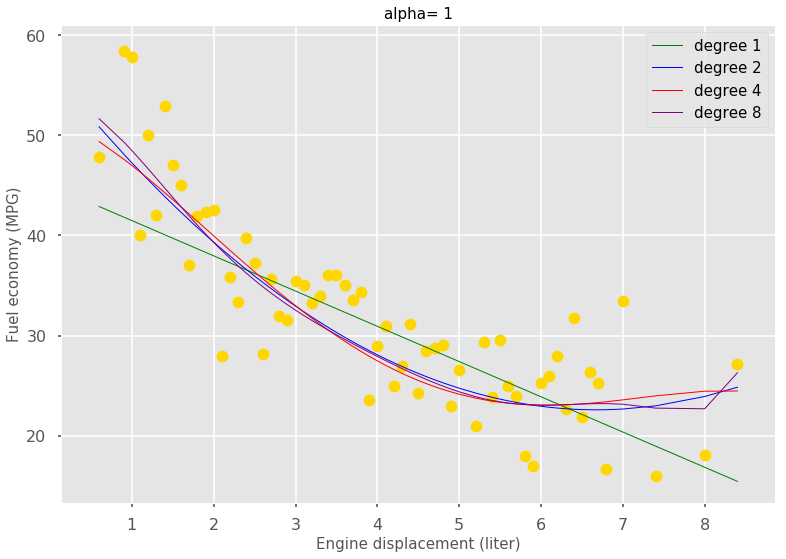

In [39]:
ridge_reg(1.0)

degree 1
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]}
	Mean squared error: 31.63 	Root mean squared error: 5.62 	R-squared score: 0.64
degree 2
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]}
	Mean squared error: 26.03 	Root mean squared error: 5.10 	R-squared score: 0.71
degree 4
	Model parameters:  {'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, r

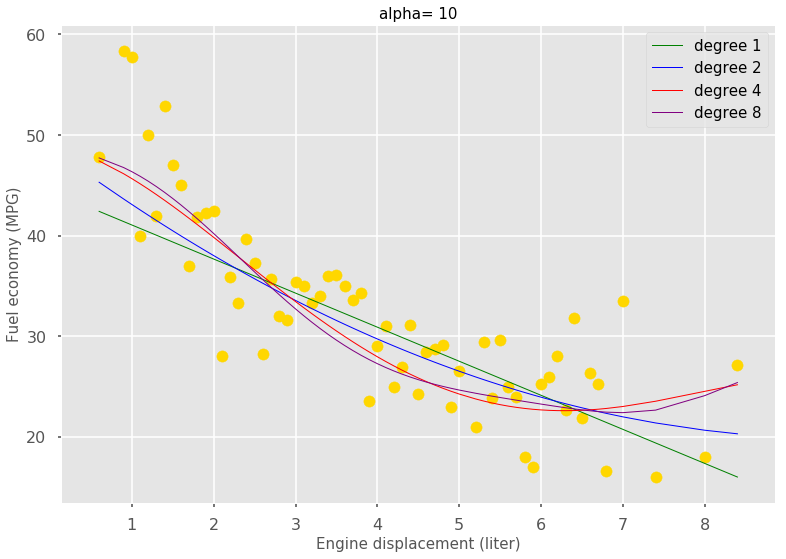

In [40]:
ridge_reg(10)